In [6]:


import pandas as pd

# Load the dataframe
df = pd.read_csv('data/ESS_electives_op_DEC2025.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| StartDate                                           | EndDate                                           | Status                | IPAddress                | Progress                | Duration (in seconds)   | Finished                | RecordedDate                                           | ResponseId               | RecipientLastName                | RecipientFirstName                | RecipientEmail                | ExternalReference                    | LocationLatitude                | LocationLongitude                | DistributionChannel                | UserLanguage                | Q_RecaptchaScore                | Q_RelevantIDDuplicate                | Q_RelevantIDDuplicateScore                | Q_RelevantIDFraudScore                | Q_RelevantIDLastStartDate                                 | Q_DuplicateRespondent                | Q_BallotBoxStuffing                | Q1                                                          | A                                             

In [7]:
# Get the first row which contains the questions
questions_row = df.iloc[0]

# Print the questions to understand the mapping
for col in df.columns:
    if col.startswith('Q') or col in ['A', 'B', 'C1', 'C2']:
         print(f"{col}: {questions_row[col]}")

# Also check unique values in Q1 to see if it lists all courses
print("\nUnique values in Q1 (excluding the first row):")
print(df['Q1'].iloc[1:].unique())

Q_RecaptchaScore: Q_RecaptchaScore
Q_RelevantIDDuplicate: Q_RelevantIDDuplicate
Q_RelevantIDDuplicateScore: Q_RelevantIDDuplicateScore
Q_RelevantIDFraudScore: Q_RelevantIDFraudScore
Q_RelevantIDLastStartDate: Q_RelevantIDLastStartDate
Q_DuplicateRespondent: Q_DuplicateRespondent
Q_BallotBoxStuffing: Q_BallotBoxStuffing
Q1: Which Foundations of Social Science module did you opt for?
A: [List A - Core] Can you please indicate if you enrolled in any of the courses below for the second semester of the first year?
B: [List B - Field] Can you please indicate if you enrolled in any of the courses below for the second semester of the first year?
C1: [List C1 - Topics] Can you please indicate if you enrolled in any of the courses below for the second semester of the first year?
C2: [List C2 - Other Topics & Methods] Can you please indicate if you enrolled in any of the courses below for the second semester of the first year?
Q6_1: Could you please answer the questions below about Advanced Micro

In [8]:
import re

questions_row = df.iloc[0]
course_map = {}

# Regex to capture course name
# Pattern looks for "about " followed by the course name, then either "?" or " -" or " again"
# Examples:
# ... questions below about Advanced Microeconomics? - ...
# ... question below about Advanced Microeconomics? - ...
# Would you enrol in Advanced Microeconomics again?
# When did you sit the exam for Advanced Microeconomics?

def extract_course_name(text):
    if not isinstance(text, str):
        return None
    
    # Pattern 1: "about <Course>? -"
    match = re.search(r"about\s+(.*?)\?\s+-", text)
    if match:
        return match.group(1).strip()
    
    # Pattern 2: "enrol in <Course> again"
    match = re.search(r"enrol in\s+(.*?)\s+again", text)
    if match:
        return match.group(1).strip()
        
    # Pattern 3: "exam for <Course>"
    match = re.search(r"exam for\s+(.*?)\??$", text)
    if match:
        return match.group(1).strip()
    
    return None

def determine_question_type(text):
    if "How difficult was the course" in text or "How hard was the course" in text:
        return "Course Difficulty"
    if "How difficult was the exam" in text or "How hard was the exam" in text:
        return "Exam Difficulty"
    if "exam was in line with what has been explained" in text:
        return "Exam Alignment"
    if "enrol in" in text and "again" in text:
        return "Enrol Again"
    if "When did you sit the exam" in text:
        return "Exam Session"
    return None

# Iterate over columns to build the map
for col in df.columns:
    q_text = questions_row[col]
    course_name = extract_course_name(q_text)
    q_type = determine_question_type(q_text)
    
    if course_name and q_type:
        if course_name not in course_map:
            course_map[course_name] = {}
        course_map[course_name][q_type] = col

# Print the found courses and their columns to verify
for course, cols in course_map.items():
    print(f"Course: {course}")
    print(f"  Columns: {cols}")

Course: Advanced Microeconomics
  Columns: {'Course Difficulty': 'Q6_1', 'Exam Difficulty': 'Q6_2', 'Exam Alignment': 'Q33_1', 'Enrol Again': 'Q7', 'Exam Session': 'Q8'}
Course: Microeconometrics
  Columns: {'Course Difficulty': 'Q9_1', 'Exam Difficulty': 'Q9_2', 'Exam Alignment': 'Q34_1', 'Enrol Again': 'Q10', 'Exam Session': 'Q11'}
Course: Advanced Macroeconomics
  Columns: {'Course Difficulty': 'Q18_1', 'Exam Difficulty': 'Q18_2', 'Exam Alignment': 'Q35_1', 'Enrol Again': 'Q19', 'Exam Session': 'Q20'}
Course: Macroeconometrics
  Columns: {'Course Difficulty': 'Q21_1', 'Exam Difficulty': 'Q21_2', 'Exam Alignment': 'Q36_1', 'Enrol Again': 'Q22', 'Exam Session': 'Q23'}
Course: Development Economics
  Columns: {'Course Difficulty': 'Q12_1', 'Exam Difficulty': 'Q12_2', 'Exam Alignment': 'Q37_1', 'Enrol Again': 'Q13', 'Exam Session': 'Q14'}
Course: Game Theory: Analysis of Strategic Thinking
  Columns: {'Course Difficulty': 'Q24_1', 'Exam Difficulty': 'Q24_2', 'Exam Alignment': 'Q38_1', '

In [9]:
# Check unique values for difficulty
print("Unique values in Q6_1:")
print(df['Q6_1'].unique())

# Check unique values for Enrol Again
print("\nUnique values in Q7:")
print(df['Q7'].unique())

# Check unique values for Exam Alignment
print("\nUnique values in Q33_1:")
print(df['Q33_1'].unique())

Unique values in Q6_1:
['Could you please answer the questions below about Advanced Microeconomics? - How difficult was the course on a scale from 1 to 5?'
 '{"ImportId":"QID6_1"}' 'Difficult' 'Somewhat difficult' nan]

Unique values in Q7:
['Would you enrol in Advanced Microeconomics again?' '{"ImportId":"QID7"}'
 'No, but I would enrol in the second year' 'Yes, I would enrol again'
 'No, I would not enrol in the course at all' nan]

Unique values in Q33_1:
['Could you please answer the question below about Advanced Microeconomics? - The exam was in line with what has been explained in class'
 '{"ImportId":"QID33_1"}' nan 'Strongly disagree' 'Somewhat disagree'
 'Neither agree nor disagree' 'Strongly agree' 'Somewhat agree']


In [10]:
# Collect all unique values from difficulty columns
diff_values = set()
for course, cols in course_map.items():
    if 'Course Difficulty' in cols:
        vals = df[cols['Course Difficulty']].iloc[1:].dropna().unique()
        diff_values.update(vals)
    if 'Exam Difficulty' in cols:
        vals = df[cols['Exam Difficulty']].iloc[1:].dropna().unique()
        diff_values.update(vals)
        
print("All Difficulty Values:")
print(diff_values)

All Difficulty Values:
{'{"ImportId":"QID45_1"}', 'Difficult', '{"ImportId":"QID42_1"}', '{"ImportId":"QID56_2"}', '{"ImportId":"QID27_2"}', '{"ImportId":"QID60_1"}', '{"ImportId":"QID18_1"}', '{"ImportId":"QID104_2"}', '{"ImportId":"QID130_1"}', '{"ImportId":"QID80_2"}', '{"ImportId":"QID116_2"}', '{"ImportId":"QID9_2"}', '{"ImportId":"QID60_2"}', '{"ImportId":"QID49_1"}', '{"ImportId":"QID92_2"}', '{"ImportId":"QID108_1"}', '{"ImportId":"QID12_1"}', '{"ImportId":"QID21_2"}', '{"ImportId":"QID24_1"}', '{"ImportId":"QID135_2"}', '{"ImportId":"QID64_2"}', '{"ImportId":"QID112_1"}', '{"ImportId":"QID49_2"}', '{"ImportId":"QID72_2"}', '{"ImportId":"QID120_2"}', '{"ImportId":"QID104_1"}', '{"ImportId":"QID27_1"}', '{"ImportId":"QID100_1"}', '{"ImportId":"QID88_2"}', '{"ImportId":"QID42_2"}', '{"ImportId":"QID68_2"}', 'Easy', '{"ImportId":"QID21_1"}', '{"ImportId":"QID30_2"}', '{"ImportId":"QID100_2"}', '{"ImportId":"QID124_2"}', '{"ImportId":"QID6_1"}', '{"ImportId":"QID88_1"}', '{"ImportI

In [11]:
# Define mappings
diff_map = {
    'Easy': 1,
    'Somewhat easy': 2,
    'Neither easy nor difficult': 3,
    'Somewhat difficult': 4,
    'Difficult': 5
}

agree_map = {
    'Strongly disagree': 5,
    'Somewhat disagree': 4,
    'Neither agree nor disagree': 3,
    'Somewhat agree': 2,
    'Strongly agree': 1
}

# Process data
records = []
# Skip the first row (questions)
data_rows = df.iloc[1:]

for idx, row in data_rows.iterrows():
    respondent_id = row['ResponseId']
    
    for course, cols in course_map.items():
        # Check if there is data for this course (check Course Difficulty)
        # Some courses might have different mandatory fields, but usually difficulty is key.
        c_diff_col = cols.get('Course Difficulty')
        
        if c_diff_col and pd.notna(row[c_diff_col]):
            record = {
                'RespondentId': respondent_id,
                'Course': course,
                'Course Difficulty Text': row[cols.get('Course Difficulty')],
                'Exam Difficulty Text': row[cols.get('Exam Difficulty')],
                'Exam Alignment Text': row[cols.get('Exam Alignment')],
                'Enrol Again Text': row[cols.get('Enrol Again')],
                'Exam Session': row[cols.get('Exam Session')],
                
                # Mapped numeric values
                'Course Difficulty': diff_map.get(row[cols.get('Course Difficulty')]),
                'Exam Difficulty': diff_map.get(row[cols.get('Exam Difficulty')]),
                'Exam Alignment': agree_map.get(row[cols.get('Exam Alignment')])
            }
            
            # Binary Enrol Again
            enrol_text = row[cols.get('Enrol Again')]
            if isinstance(enrol_text, str):
                if "Yes" in enrol_text:
                    record['Enrol Again Numeric'] = 1
                else:
                    record['Enrol Again Numeric'] = 0
            else:
                 record['Enrol Again Numeric'] = None
                 
            records.append(record)

long_df = pd.DataFrame(records)

# Calculate Summary Statistics
summary = long_df.groupby('Course').agg(
    Responses=('RespondentId', 'count'),
    Avg_Course_Difficulty=('Course Difficulty', 'mean'),
    Avg_Exam_Difficulty=('Exam Difficulty', 'mean'),
    Avg_Exam_Alignment=('Exam Alignment', 'mean'),
    Enrol_Again_Rate=('Enrol Again Numeric', 'mean')
).reset_index()

# Sort by Number of Responses
summary = summary.sort_values('Responses', ascending=False)

print("Summary Table:")
print(summary.to_markdown(numalign="left", stralign="left"))

# Save to CSVs
long_df.to_csv('processed_course_feedback.csv', index=False)
summary.to_csv('course_feedback_summary.csv', index=False)

KeyError: None

In [12]:
def safe_get(row, col_name):
    if col_name is not None and col_name in row.index:
        return row[col_name]
    return None

records = []
data_rows = df.iloc[1:]

for idx, row in data_rows.iterrows():
    respondent_id = row['ResponseId']
    
    for course, cols in course_map.items():
        c_diff_col = cols.get('Course Difficulty')
        
        # Only proceed if we have a valid Course Difficulty column and it is not null
        # (Assuming Course Difficulty is the indicator that the course was taken)
        if c_diff_col and pd.notna(safe_get(row, c_diff_col)):
            
            c_diff_val = safe_get(row, cols.get('Course Difficulty'))
            e_diff_val = safe_get(row, cols.get('Exam Difficulty'))
            e_align_val = safe_get(row, cols.get('Exam Alignment'))
            enrol_val = safe_get(row, cols.get('Enrol Again'))
            session_val = safe_get(row, cols.get('Exam Session'))
            
            record = {
                'RespondentId': respondent_id,
                'Course': course,
                'Course Difficulty Text': c_diff_val,
                'Exam Difficulty Text': e_diff_val,
                'Exam Alignment Text': e_align_val,
                'Enrol Again Text': enrol_val,
                'Exam Session': session_val,
                
                'Course Difficulty': diff_map.get(c_diff_val),
                'Exam Difficulty': diff_map.get(e_diff_val),
                'Exam Alignment': agree_map.get(e_align_val)
            }
            
            if isinstance(enrol_val, str):
                if "Yes" in enrol_val:
                    record['Enrol Again Numeric'] = 1
                else:
                    record['Enrol Again Numeric'] = 0
            else:
                 record['Enrol Again Numeric'] = None
            
            records.append(record)

long_df = pd.DataFrame(records)

# Calculate Summary Statistics
summary = long_df.groupby('Course').agg(
    Responses=('RespondentId', 'count'),
    Avg_Course_Difficulty=('Course Difficulty', 'mean'),
    Avg_Exam_Difficulty=('Exam Difficulty', 'mean'),
    Avg_Exam_Alignment=('Exam Alignment', 'mean'),
    Enrol_Again_Rate=('Enrol Again Numeric', 'mean')
).reset_index()

summary = summary.sort_values('Responses', ascending=False)

print("Summary Table:")
print(summary.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

# Save files
long_df.to_csv('processed_course_feedback.csv', index=False)
summary.to_csv('course_feedback_summary.csv', index=False)

Summary Table:
|    | Course                                                              | Responses   | Avg_Course_Difficulty   | Avg_Exam_Difficulty   | Avg_Exam_Alignment   | Enrol_Again_Rate   |
|:---|:--------------------------------------------------------------------|:------------|:------------------------|:----------------------|:---------------------|:-------------------|
| 21 | Microeconometrics                                                   | 58          | 3.77                    | 4.04                  | 2.61                 | 0.95               |
| 11 | Foundation of Social Sciences - Module II A                         | 46          | 2.16                    | 2.23                  | 2.18                 | nan                |
| 12 | Foundation of Social Sciences - Module II B                         | 33          | 2.28                    | 2.68                  | 2.03                 | nan                |
| 29 | Time Series Analysis of Economic and Financial Data  

Updated Summary:
|    | Course                                                              | Responses   | Avg_Course_Difficulty   | Avg_Exam_Difficulty   | Avg_Exam_Alignment   | Enrol_Again_Rate   |
|:---|:--------------------------------------------------------------------|:------------|:------------------------|:----------------------|:---------------------|:-------------------|
| 10 | Energy Policy and Sustainability                                    | 5           | 1.50                    | 2.00                  | 2.50                 | 0.60               |
| 6  | Economic Analysis of Crime                                          | 10          | 1.67                    | 2.44                  | 1.89                 | 0.90               |
| 25 | Population Dynamics and Economics                                   | 7           | 2.00                    | 2.60                  | 2.60                 | 0.57               |
| 3  | Comparative Politics: Institutions and Institutiona

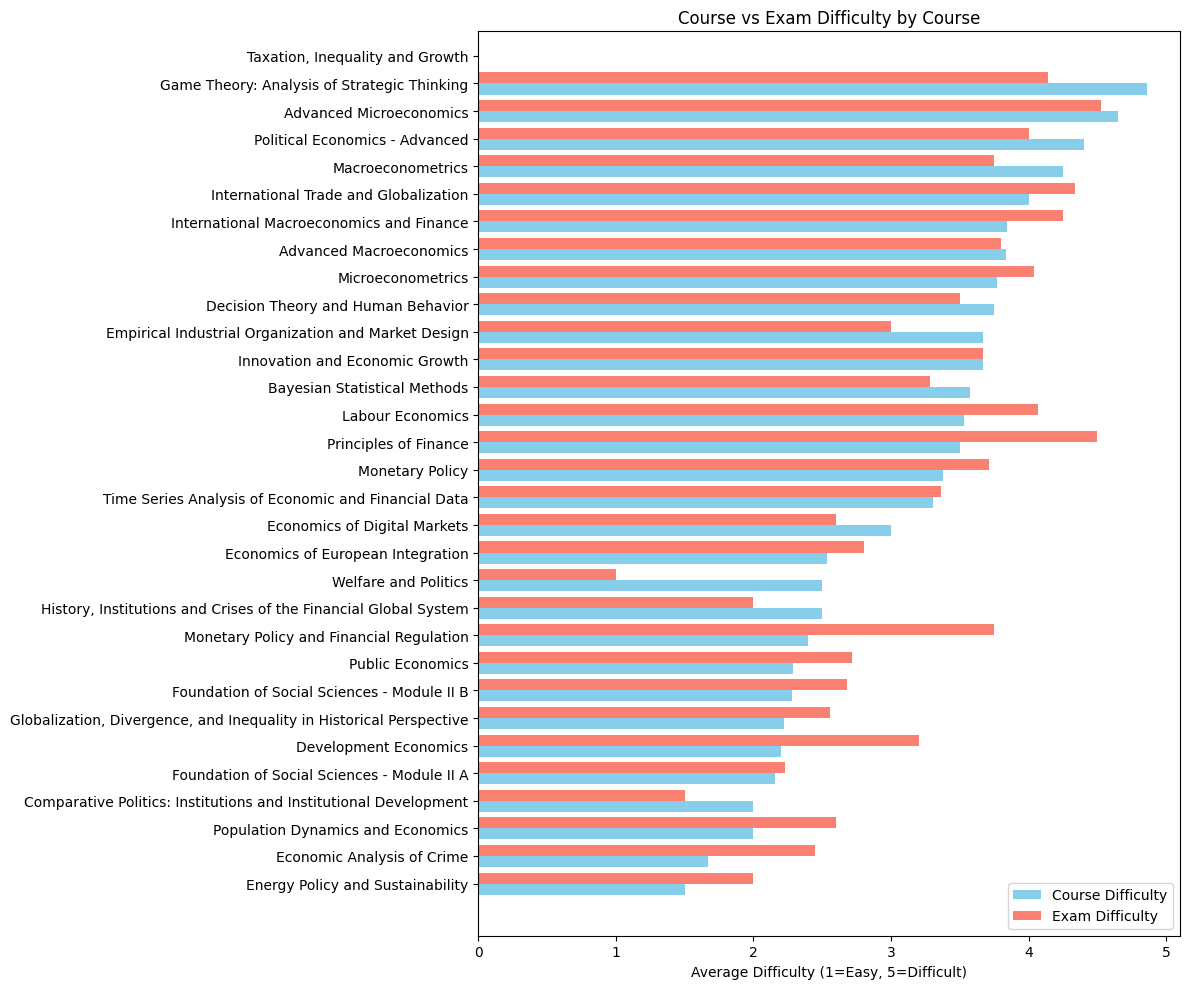

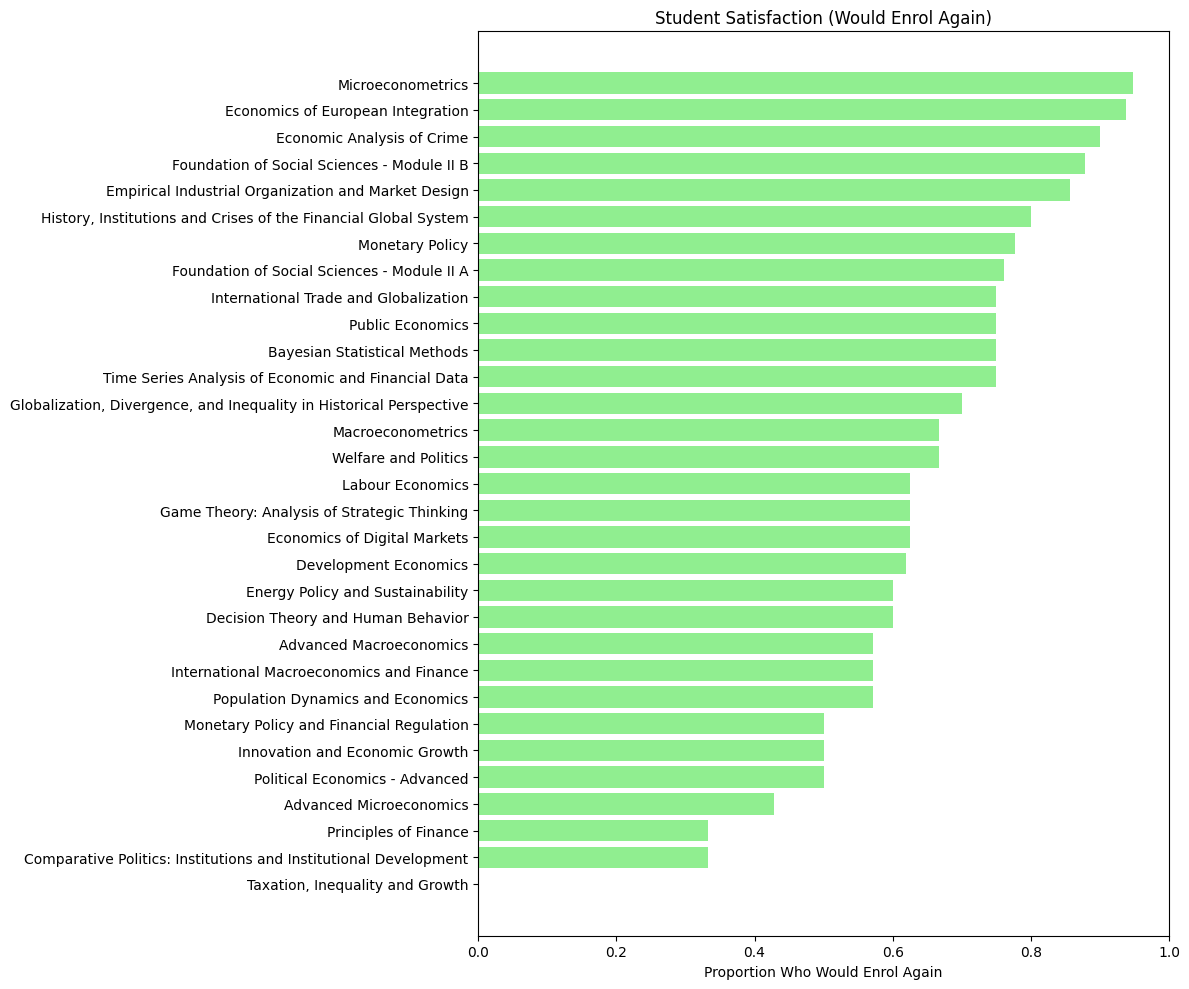

In [13]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Updated Regex functions
def extract_course_name_v2(text):
    if not isinstance(text, str):
        return None
    
    # Pattern 1: "about <Course>? -"
    match = re.search(r"about\s+(.*?)\?\s+-", text)
    if match:
        return match.group(1).strip()
    
    # Pattern 2: "Would you enrol in <Course> [again]?"
    # Handles "Would you enrol in X again?" and "Would you enrol in X?"
    match = re.search(r"Would you enrol in\s+(.*?)( again)?\??$", text, re.IGNORECASE)
    if match:
        return match.group(1).strip()
        
    # Pattern 3: "exam for <Course>"
    match = re.search(r"exam for\s+(.*?)\??$", text)
    if match:
        return match.group(1).strip()
    
    return None

def determine_question_type_v2(text):
    if "How difficult was the course" in text or "How hard was the course" in text:
        return "Course Difficulty"
    if "How difficult was the exam" in text or "How hard was the exam" in text:
        return "Exam Difficulty"
    if "exam was in line with what has been explained" in text:
        return "Exam Alignment"
    if "Would you enrol in" in text:
        return "Enrol Again"
    if "When did you sit the exam" in text:
        return "Exam Session"
    return None

# Re-build map with better regex
course_map_v2 = {}
questions_row = df.iloc[0]

for col in df.columns:
    q_text = questions_row[col]
    course_name = extract_course_name_v2(q_text)
    q_type = determine_question_type_v2(q_text)
    
    if course_name and q_type:
        if course_name not in course_map_v2:
            course_map_v2[course_name] = {}
        course_map_v2[course_name][q_type] = col

# Re-process data
records = []
data_rows = df.iloc[1:]

for idx, row in data_rows.iterrows():
    respondent_id = row['ResponseId']
    
    for course, cols in course_map_v2.items():
        c_diff_col = cols.get('Course Difficulty')
        
        if c_diff_col and pd.notna(safe_get(row, c_diff_col)):
            
            c_diff_val = safe_get(row, cols.get('Course Difficulty'))
            e_diff_val = safe_get(row, cols.get('Exam Difficulty'))
            e_align_val = safe_get(row, cols.get('Exam Alignment'))
            enrol_val = safe_get(row, cols.get('Enrol Again'))
            session_val = safe_get(row, cols.get('Exam Session'))
            
            record = {
                'RespondentId': respondent_id,
                'Course': course,
                'Course Difficulty': diff_map.get(c_diff_val),
                'Exam Difficulty': diff_map.get(e_diff_val),
                'Exam Alignment': agree_map.get(e_align_val)
            }
            
            if isinstance(enrol_val, str):
                if "Yes" in enrol_val:
                    record['Enrol Again Numeric'] = 1
                else:
                    record['Enrol Again Numeric'] = 0
            else:
                 record['Enrol Again Numeric'] = None
            
            records.append(record)

long_df = pd.DataFrame(records)

# Summary
summary = long_df.groupby('Course').agg(
    Responses=('RespondentId', 'count'),
    Avg_Course_Difficulty=('Course Difficulty', 'mean'),
    Avg_Exam_Difficulty=('Exam Difficulty', 'mean'),
    Avg_Exam_Alignment=('Exam Alignment', 'mean'),
    Enrol_Again_Rate=('Enrol Again Numeric', 'mean')
).reset_index()

# Filter out courses with very few responses for plotting clarity (optional, but good for visualization)
# Let's keep all but sort them
summary = summary.sort_values('Avg_Course_Difficulty', ascending=True)

# Plotting
plt.figure(figsize=(12, 10))
y_pos = range(len(summary))
plt.barh([y - 0.2 for y in y_pos], summary['Avg_Course_Difficulty'], height=0.4, label='Course Difficulty', color='skyblue')
plt.barh([y + 0.2 for y in y_pos], summary['Avg_Exam_Difficulty'], height=0.4, label='Exam Difficulty', color='salmon')

plt.yticks(y_pos, summary['Course'])
plt.xlabel('Average Difficulty (1=Easy, 5=Difficult)')
plt.title('Course vs Exam Difficulty by Course')
plt.legend()
plt.tight_layout()
plt.savefig('difficulty_comparison.png')

# Plot Enrolment Rate
plt.figure(figsize=(12, 10))
summary_enrol = summary.sort_values('Enrol_Again_Rate', ascending=True)
plt.barh(summary_enrol['Course'], summary_enrol['Enrol_Again_Rate'], color='lightgreen')
plt.xlabel('Proportion Who Would Enrol Again')
plt.title('Student Satisfaction (Would Enrol Again)')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.savefig('enrolment_rate.png')

# Save Summary
summary.to_csv('course_feedback_summary_v2.csv', index=False)

print("Updated Summary:")
print(summary.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))